In [2]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = np.load(rf"Z:\200 Produced_data\20230120\AE\menseki\50khz\All1.npy")

In [11]:
d_pt1 = d[:120]
d_pt2 = d[120:]

In [12]:
print(d_pt1.shape)
print(d_pt2.shape)

(120, 1200)
(340, 1200)


In [ ]:
np.save(rf"Z:\200 Produced_data\20230120\AE\menseki\50khz\All1_1-120",d_pt1)

In [18]:
for i in range(1,11):
    d = np.load(rf"Z:\200 Produced_data\20230113+0117\AE\menseki\50khz\work\All{i}.npy")
    d_pt1 = d[:120]
    d_pt2 = d[120:]
    np.save(rf"Z:\200 Produced_data\20230113+0117\AE\menseki\50khz\work\All{i}_1-120",d_pt1)
    np.save(rf"Z:\200 Produced_data\20230113+0117\AE\menseki\50khz\work\All{i}_121-460",d_pt2)

In [112]:
date = 20230123
d_min = []
d_max = []
spectrum = []
d_std = []

for i in range(0,10):
    start = i * 50
    end = (i+1) *50

    d = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\All{i+1}_121-460.npy")
    d = d.T
    d = d.ravel()
    
    d_min.append(np.min(d))
    d_max.append(np.max(d))
    spectrum.append(f"{start}-{end}")
    
    d = preprocessing.minmax_scale(d)
    d_std.append(np.std(d))

d_min = np.array(d_min)
d_max = np.array(d_max)
d_minmax_diff = d_max - d_min


dict1 = dict(spectrum = spectrum[:] ,min_ = d_min[:], max_ = d_max[:], diff_ = d_minmax_diff[:], d_std = d_std[:])
df1 = pd.DataFrame(data=dict1)
df1.to_csv(rf'Z:\200 Produced_data\{date}\AE\menseki\50khz\work\EachSpectrumMinMax_121-460.csv')


In [113]:
df = pd.read_csv(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\EachSpectrumMinMax_121-460.csv")
df

Unnamed: 0 spectrum         min_         max_        diff_     d_std
0           0     0-50  1937.124622  2723.212584   786.087962  0.098260
1           1   50-100  1420.487690  3194.051915  1773.564225  0.081488
2           2  100-150  1566.161198  3339.784394  1773.623196  0.076294
3           3  150-200  1902.994163  3925.066633  2022.072470  0.064966
4           4  200-250  2128.996104  4170.322582  2041.326478  0.102095
5           5  250-300  1881.373878  3468.355546  1586.981668  0.130175
6           6  300-350  2107.925797  3429.671483  1321.745685  0.095367
7           7  350-400  1874.826236  3365.848898  1491.022662  0.091233
8           8  400-450  1807.862063  3328.968439  1521.106376  0.098725
9           9  450-500  1758.516019  3342.493614  1583.977596  0.099059

100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


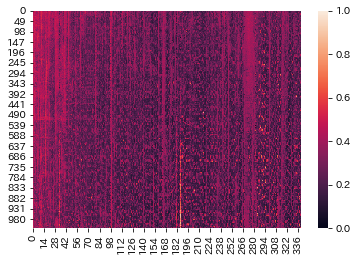

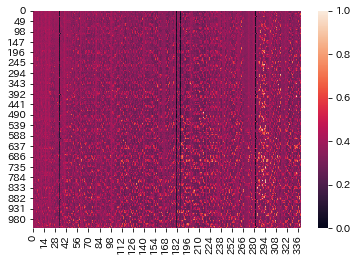

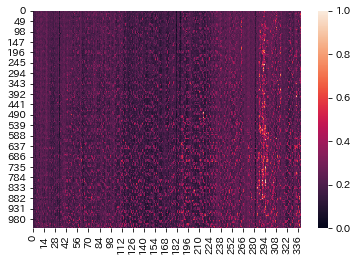

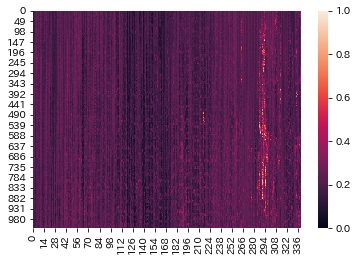

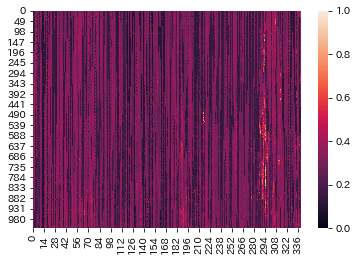

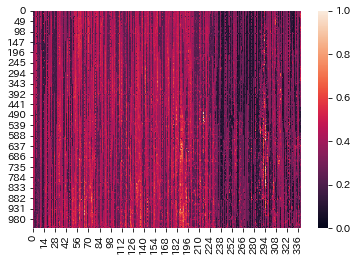

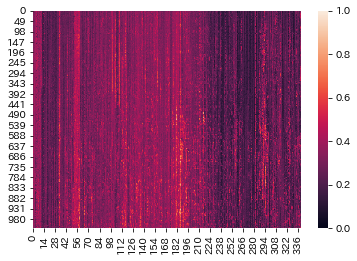

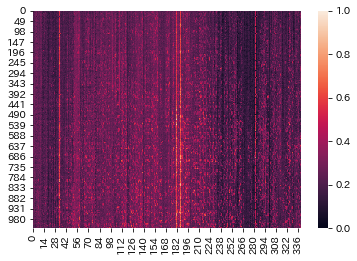

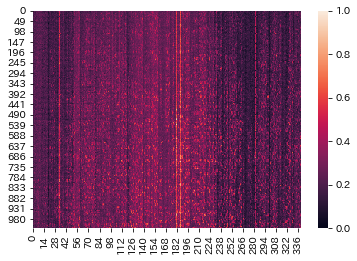

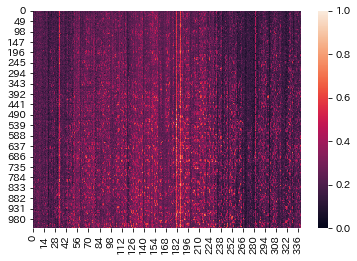

In [114]:
%matplotlib inline
for i in tqdm(range(0,10)):
    figure, ax = plt.subplots()
    d = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\All{i+1}_121-460.npy")
    d = d.ravel()
    d = preprocessing.minmax_scale(d)
    np.save(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\All{i+1}Norm_flatten_121-460",d)
    d = d.reshape(340, int(len(d)/340))
    np.save(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\All{i+1}_Norm_121-460",d)
    sns.heatmap(d.T)
    figure.savefig(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\All{i+1}_Norm_121-460.png", dpi=500)

In [96]:
%matplotlib qt
num = 3
norm = np.load(rf"Z:\200 Produced_data\20230123\AE\menseki\50khz\All{num}Norm_flatten_121-460.npy")
plt.plot(norm)

In [82]:
%matplotlib qt
norm_n = np.where(norm > 0.6, 2, norm)
index = np.where(norm_n == 2)
d = np.load(rf"Z:\200 Produced_data\20230120\AE\menseki\50khz\All{num}_121-460.npy")
d = d.ravel()
d_o = d.copy()
index = index[0]
print(index)
print(d[index])
d[index] = np.average(d)
print(len(index))
plt.plot(d_o)
plt.plot(d)

[ 97200 126000 189600 289200 326400]
[1870.39675369 2059.67336529 2035.89949839 1891.13884086 2065.88199697]
5


In [83]:
d = d.reshape(int(len(d)/1200),1200)
np.save(rf"Z:\200 Produced_data\20230120\AE\menseki\50khz\All{num}_NOoutlier_121-460",d)

In [86]:
date = 20230120
d_min = []
d_max = []
spectrum = []
d_std = []

for i in range(0,10):
    start = i * 50
    end = (i+1) *50

    d = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\All{i+1}_NOoutlier_121-460.npy")
    d = d.T
    d = d.ravel()
    
    d_min.append(np.min(d))
    d_max.append(np.max(d))
    spectrum.append(f"{start}-{end}")
    
    d = preprocessing.minmax_scale(d)
    d_std.append(np.std(d))

d_min = np.array(d_min)
d_max = np.array(d_max)
d_minmax_diff = d_max - d_min


dict1 = dict(spectrum = spectrum[:] ,min_ = d_min[:], max_ = d_max[:], diff_ = d_minmax_diff[:], d_std = d_std[:])
df1 = pd.DataFrame(data=dict1)
df1.to_csv(rf'Z:\200 Produced_data\{date}\AE\menseki\50khz\EachSpectrumMinMax_NOoutlier_121-460.csv')

In [87]:
df = pd.read_csv(rf'Z:\200 Produced_data\{date}\AE\menseki\50khz\work\EachSpectrumMinMax_NOoutlier_121-460.csv')
df

Unnamed: 0 spectrum         min_         max_        diff_     d_std
0           0     0-50  1675.648590  2541.388786   865.740197  0.087498
1           1   50-100  1663.859747  3124.617079  1460.757332  0.076923
2           2  100-150  1470.155145  3047.532918  1577.377773  0.068389
3           3  150-200  1659.712620  3136.164712  1476.452092  0.117067
4           4  200-250  1675.094563  3419.357947  1744.263384  0.224111
5           5  250-300  1637.794645  3037.807894  1400.013249  0.171808
6           6  300-350  1659.703607  2907.101227  1247.397620  0.120239
7           7  350-400  1657.352488  3003.671394  1346.318906  0.085404
8           8  400-450  1678.638763  3085.160120  1406.521358  0.085682
9           9  450-500  1654.588963  3056.191342  1401.602378  0.090102

100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


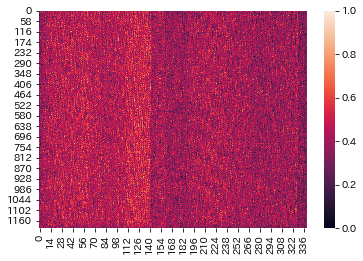

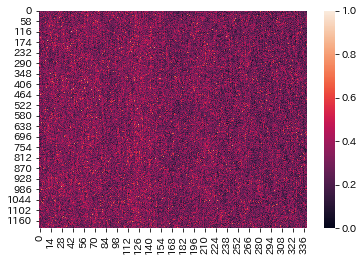

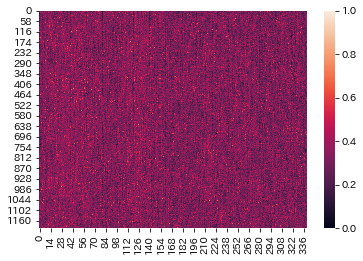

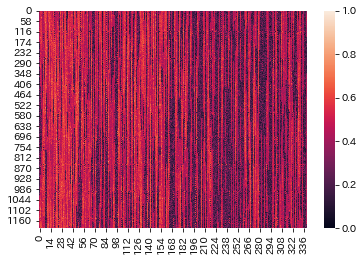

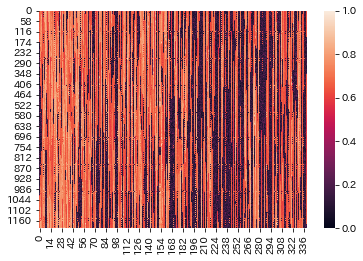

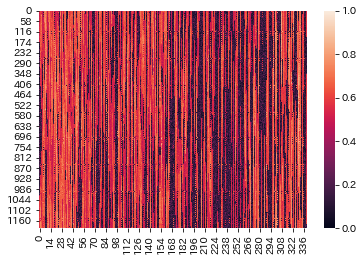

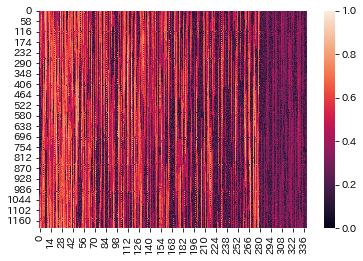

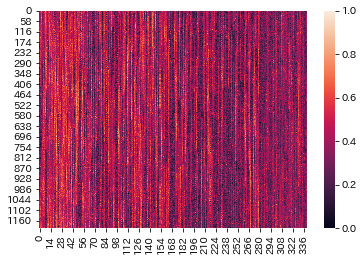

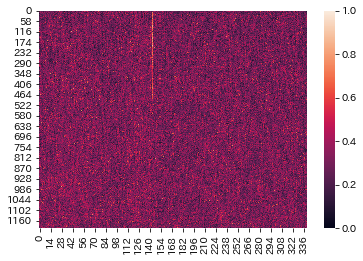

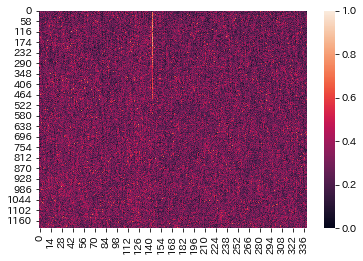

In [88]:
%matplotlib inline
for i in tqdm(range(0,10)):
    figure, ax = plt.subplots()
    d = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\All{i+1}_NOoutlier_121-460.npy")
    d = d.ravel()
    d = preprocessing.minmax_scale(d)
    np.save(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\NOoutlier\All{i+1}Norm_flatten_121-460",d)
    d = d.reshape(340, int(len(d)/340))
    np.save(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\NOoutlier\All{i+1}_Norm_121-460",d)
    sns.heatmap(d.T)
    figure.savefig(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\NOoutlier\All{i+1}_Norm_121-460.png", dpi=500)

In [115]:
#all_path_num
a_p_n = 340
#all_rotation_num
a_r_n = 1023
#moving avg path step
m_a_p_s = 10

w_size = a_r_n*m_a_p_s
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

In [116]:
date = 20230123

In [117]:
for num in tqdm(range(0,10)):
    ae = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\All{num+1}Norm_flatten_121-460.npy")
    aem = np.convolve(ae,v, mode='valid')
    np.save(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\All{num+1}Norm_flatten_MA_121-460",aem)

100%|██████████| 10/10 [02:39<00:00, 15.98s/it]


In [108]:
# ae = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\All10Norm_flatten_121-460.npy")
# len(ae)/1023
d = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\All10Norm_flatten_MA_121-460.npy")
(len(d) -1)

335820

In [126]:
cfm = np.load(rf"Z:\200 Produced_data\{date}\CF\max8308\All_1-120_MA.npy")

100%|██████████| 10/10 [00:03<00:00,  3.26it/s]


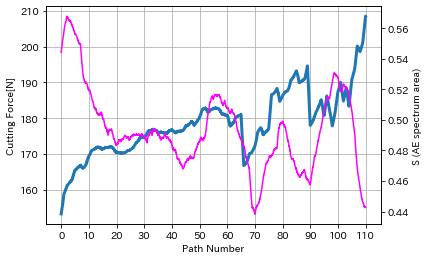

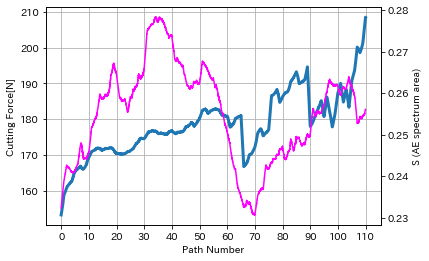

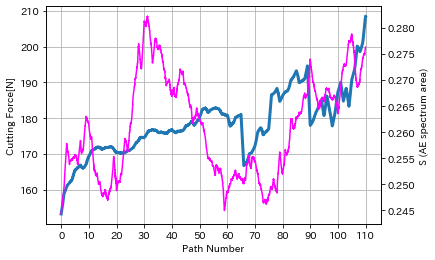

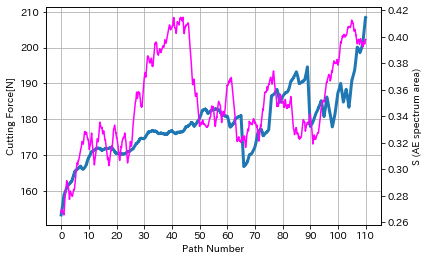

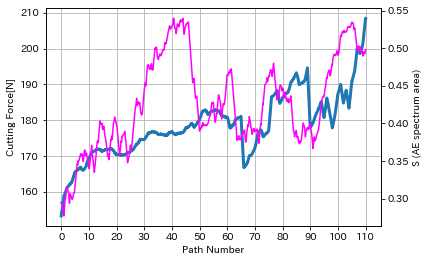

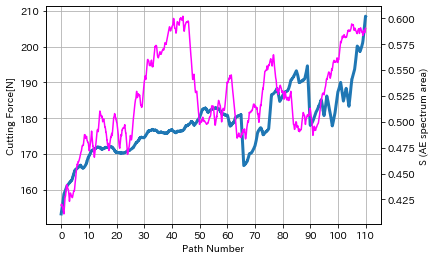

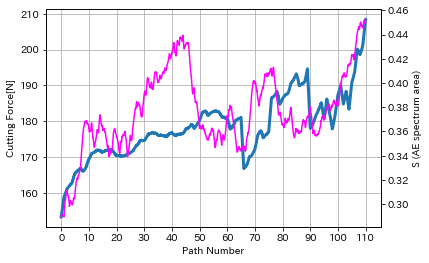

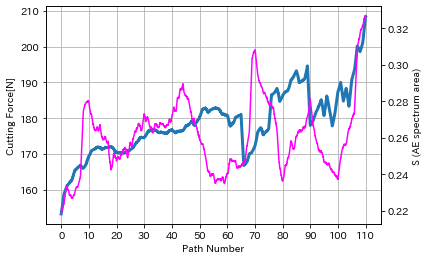

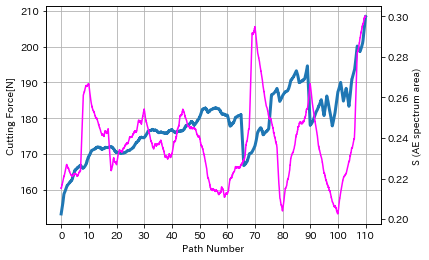

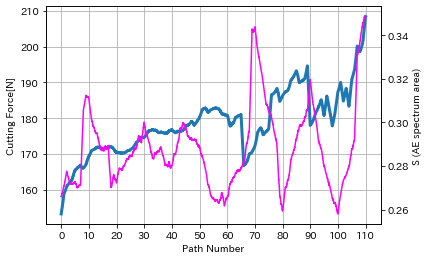

In [127]:
# %matplotlib qt

#all_path_num
a_p_n = 120
#all_rotation_num
a_r_n = 1200
#moving avg path step
m_a_p_s = 10



correlation_list = []
spectrum = []


for i in tqdm(range(0,10)):
    aem = np.load(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\NOoutlier\All{i+1}Norm_flatten_MA_1-120.npy")
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_xticks(np.arange(1, a_p_n*a_r_n, a_r_n*m_a_p_s))
    ax.set_xticklabels(np.arange(0,a_p_n,m_a_p_s))
    ax.set_xlabel(xlabel='Path Number')
    ax.set_ylabel(ylabel='S (AE spectrum area)')
    ax.set_ylabel(ylabel='Cutting Force[N]')
    ax.tick_params(axis = 'x')
    ax.tick_params(axis = 'y')
    ax2 = ax.twinx()
    ax2.set_ylabel(ylabel='S (AE spectrum area)')
    ax.grid()
    ax.plot(cfm, lineWidth="3", label="cutting force")
    ax2.plot(aem, color="magenta")
    plt.savefig(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\work\NOoutlier\cf_and_S{i+1}_1-120.png")
    correlation = np.corrcoef(cfm, aem)
    correlation_list.append(correlation[0][1])
    start = i * 50
    end = (i+1) *50
    spectrum.append(f"{start}-{end}")

dict1 = dict(spectrum = spectrum[:] , corr = correlation_list[:])
df1 = pd.DataFrame(data=dict1)
df1.to_csv(rf'Z:\200 Produced_data\{date}\AE\menseki\50khz\work\NOoutlier\EachSpectrumCorrelationWithCF_movingAVG(10path)_1-120.csv')

In [62]:
# df = pd.read_csv(rf'Z:\200 Produced_data\20230120\AE\menseki\50khz\NOoutlier\EachSpectrumCorrelationWithCF_movingAVG(10path)_1-120.csv')
df = pd.read_csv(rf'Z:\200 Produced_data\20230123\AE\menseki\50khz\EachSpectrumCorrelationWithCF_movingAVG(10path)_1-120.csv')

df

Unnamed: 0 spectrum      corr
0           0     0-50  0.104428
1           1   50-100  0.206349
2           2  100-150 -0.012421
3           3  150-200 -0.094862
4           4  200-250 -0.188659
5           5  250-300 -0.167506
6           6  300-350 -0.265443
7           7  350-400 -0.078281
8           8  400-450 -0.129710
9           9  450-500 -0.134939